# 1) Implement the generalized equation for finding the gradient of m-samples, each having n-features. Also, implement the gradient descent approach assuming a constant learning rate.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def gradient_decent(x_train,y_train,lr,epoch ):
    m = len(x_train) # No. of samples
    n = len(x_train.T) # No. of features
    print(n)
    wts = np.zeros([epoch,n])  # Matrix to contain weights for each iterations
    w = np.ones((n,1)) # Weight initialization
    wts[0] = w[:,0]
    losses = []  # List to store loss each iteration
    for i in range(epoch):
        y_pred = np.dot(x_train,w)   # predicted value of y
        loss = np.mean((y_pred-y_train)**2)
        losses.append(loss)
        grad = np.zeros(n)
        wts[i] = w[:,0]
        for j in range(n):
            x = x_train[:,j].reshape(-1,1)
            grad[j] = (2/m)*np.dot((y_pred-y_train).T,x)  # calculating gradient w.r.to each weights
            w[j] = w[j] - lr*grad[j]   # Updating weights
    
    
    return w,losses,wts

# 2) Using the code developed for problem 1, do the linear regression for the univariate problem using the attached data file univariate_linear_regression.csv. Plot the cost function (both as surface as well as contour) as well as the best fit line. 

In [2]:
df2 = pd.read_csv('univariate_linear_regression.csv')
df2

,x,y
0,-1.932,-13.569
1,-2.953,-19.207
2,8.879,17.665
3,9.259,15.835
4,3.033,-0.495
...,...,...
195,5.415,7.125
196,3.333,0.857
197,-3.493,-20.700
198,8.839,15.153


In [3]:
df2 = pd.read_csv('univariate_linear_regression.csv')
df = df2[['x']]
x_train = df.values  # Convert the data frame to an array
y = df2[['y']]
y_actual = y.values

# Normalize the tarin data
col_2 = (x_train[:,0]-x_train[:,0].mean())/ (x_train[:,0].std())# - x_train[:,0].min())
col_1 = np.ones_like(col_2)

x_train_normalise = np.stack([col_1, col_2], axis = 0).T

In [4]:
lr = 0.1
epochs = 1000
f_wts, losses, wts_lst = gradient_decent(x_train_normalise,y_actual,lr,epochs)
f_wts
# losses

2


array([[-8.296385  ],
       [16.97269588]])

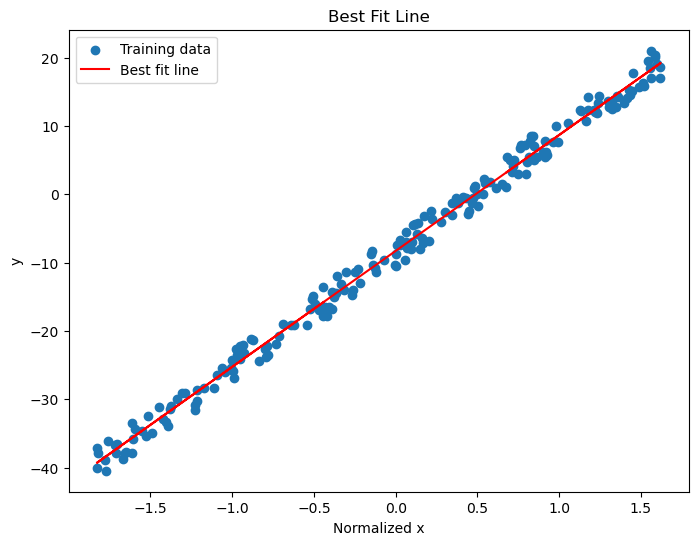

In [10]:
# Plot best fit line
plt.figure(figsize=(8, 6))
plt.scatter(x_train_normalise[:, 1], y_actual, label='Training data')
plt.plot(x_train_normalise[:, 1], np.dot(x_train_normalise, f_wts), color='red', label='Best fit line')
plt.xlabel('Normalized x')
plt.ylabel('y')
plt.legend()
plt.title('Best Fit Line')
plt.show()


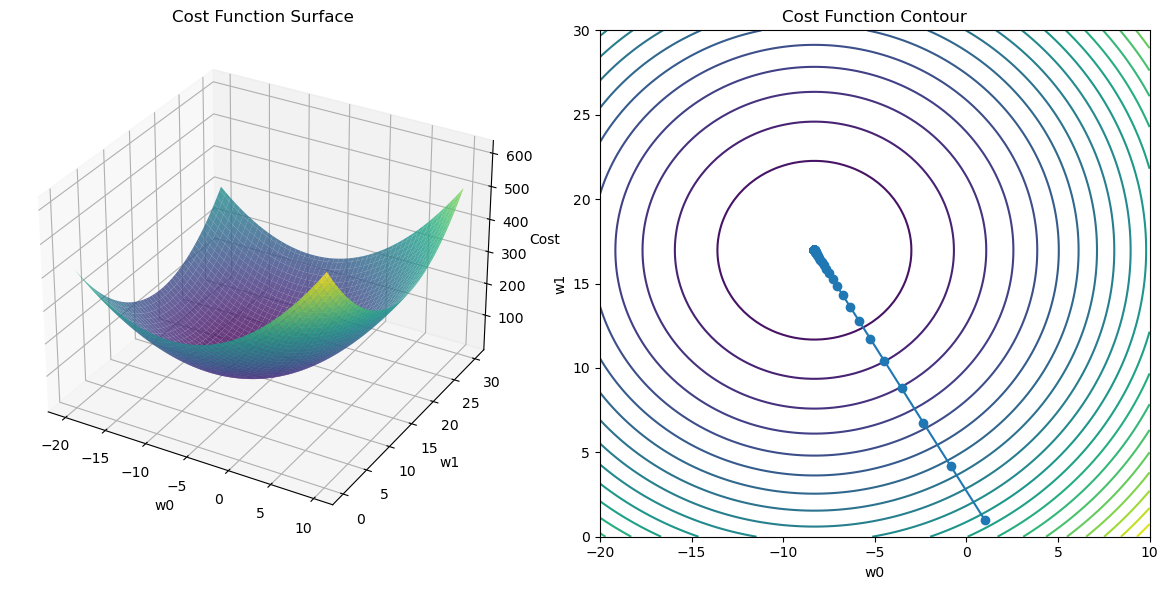

In [280]:
# Plot cost function
fig = plt.figure(figsize=(12, 6))

# Plot surface
ax1 = fig.add_subplot(121, projection='3d')
w0_vals = np.linspace(-20, 10, 100)
w1_vals = np.linspace(0, 30, 100)
w0_vals, w1_vals = np.meshgrid(w0_vals, w1_vals)
cost_vals = np.zeros_like(w0_vals)
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w_tmp = np.array([[w0_vals[i, j]], [w1_vals[i, j]]])
        y_pred_tmp = np.dot(x_train_normalized, w_tmp)
        cost_vals[i, j] = np.mean((y_pred_tmp - y_actual) ** 2)
ax1.plot_surface(w0_vals, w1_vals, cost_vals, cmap='viridis', alpha=0.8)
ax1.set_xlabel('w0')
ax1.set_ylabel('w1')
ax1.set_zlabel('Cost')
ax1.set_title('Cost Function Surface')

# Plot contour
ax2 = fig.add_subplot(122)
ax2.contour(w0_vals, w1_vals, cost_vals, levels=20, cmap='viridis')
ax2.plot(wts_lst[:,0],wts_lst[:,1],'o-')
ax2.set_xlabel('w0')
ax2.set_ylabel('w1')
ax2.set_title('Cost Function Contour')

plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

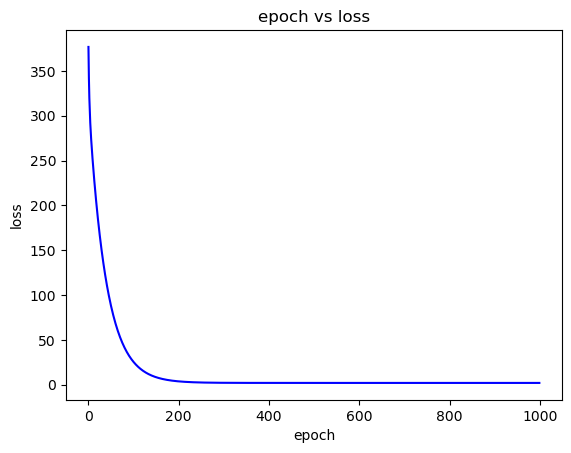

In [272]:
plt.plot(list(range(epochs)),losses,color = 'blue')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('epoch vs loss')
plt.show

# 3) Using the code developed for problem 1, do the linear regression for the multivariate problem using the attached data file heart.data.csv. Plot the best fit plane for the given data. Can you also interpret the result (taking one independent variable at a time)?



In [232]:
import numpy as np
import pandas as pd

def gradient_decent1(x_train,y_train,lr,epoch ):
    m = len(x_train)
    n = len(x_train.T)
    print(n)
    wts = np.zeros((epoch,n))
    w = np.ones((n,1))
#     wts[0] = w[:,0]
    losses = []
    for i in range(epoch):
        y_pred = np.dot(x_train,w)
        loss = np.mean((y_pred-y_train)**2)
        losses.append(loss)
        grad = np.zeros(n)
        
        for j in range(n):
            x = x_train[:,j].reshape(-1,1)
            grad[j] = (2/m)*np.dot((y_pred-y_train).T,x)
            w[j] = w[j] - lr*grad[j]
        
        wts[i] = w[:,0]

        
    
    
    return w,losses,wts

In [4]:
df = pd.read_csv('heart.data.csv')
df

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224
...,...,...,...,...
493,494,47.660440,27.562464,11.294392
494,495,45.097203,21.385620,9.616762
495,496,8.279743,6.423720,13.495168
496,497,42.345863,20.741328,10.115865


In [233]:
df = pd.read_csv('heart.data.csv')
y = df[['heart.disease']]
y = y.values
df = df[['biking','smoking']]
data = df.values
col_1 = (data[:,0]-data[:,0].mean())/ data[:,0].std() #- data[:,0].min())
col_2 = (data[:,1]-data[:,1].mean())/ data[:,1].std()# - data[:,1].min())
col_3 = np.ones_like(col_1)
train_data = np.stack([col_3, col_1, col_2], axis = 0).T
train_data

array([[ 1.        , -0.32559109, -0.54801112],
       [ 1.        ,  1.27403916, -1.5957569 ],
       [ 1.        , -1.66956414,  0.26000867],
       ...,
       [ 1.        , -1.37505824, -1.0881086 ],
       [ 1.        ,  0.21237023,  0.64073038],
       [ 1.        , -0.32684886,  0.98714126]])

In [249]:
lr = 0.01
epochs = 1000
f_wts, loss, wts_lst = gradient_decent1(train_data,y,lr,epochs)
# f_wts
# losses
# wts_lst
f_wts.ravel()

3


array([10.17453805, -4.29484331,  1.47689583])

<function matplotlib.pyplot.show(close=None, block=None)>

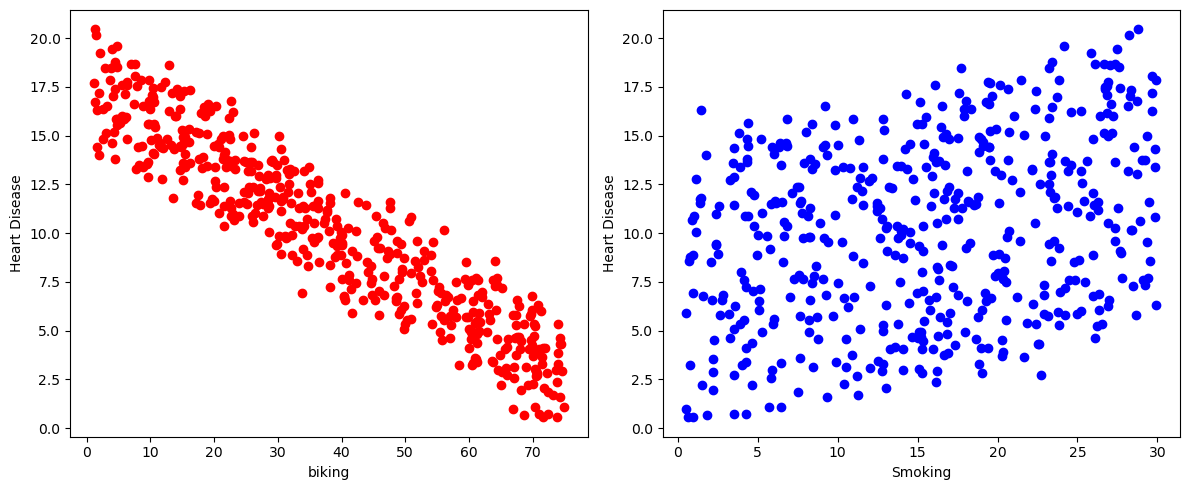

In [241]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(data[:,0],y,color='r',marker='o')
plt.xlabel('biking')
plt.ylabel('Heart Disease')

plt.subplot(1,2,2)
plt.scatter(data[:,1],y,color='b',marker='o')
plt.xlabel('Smoking')
plt.ylabel('Heart Disease')

plt.tight_layout()
plt.show



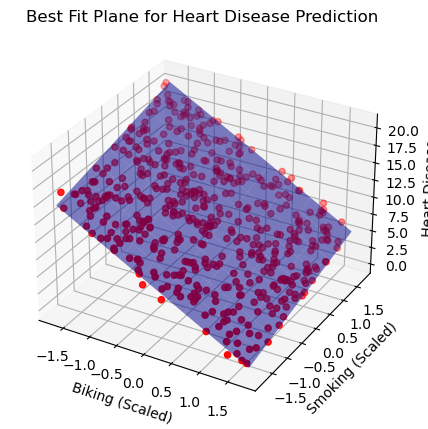

Intercept: 10.174538052529313
Coefficient for Biking: -4.294843310623749
Coefficient for Smoking: 1.4768958285310825


In [259]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111, projection='3d')
intercept, coef_biking, coef_smoking = f_wts.ravel()
# Scatter plot for the data points
ax.scatter(train_data[:, 1], train_data[:, 2], y, color='red', label='Data Points')

# Create grid coordinates for the plane
x_surf = np.linspace(train_data[:, 1].min(), train_data[:, 1].max(), 10)
y_surf = np.linspace(train_data[:, 2].min(), train_data[:, 2].max(), 10)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

# Calculate corresponding z coordinates for the plane
z_surf = intercept + coef_biking * x_surf + coef_smoking * y_surf

# Plot the best fit plane
ax.plot_surface(x_surf, y_surf, z_surf, color='blue', alpha=0.5, label='Best Fit Plane')

# Set labels and legend
ax.set_xlabel('Biking (Scaled)')
ax.set_ylabel('Smoking (Scaled)')
ax.set_zlabel('Heart Disease')

plt.title('Best Fit Plane for Heart Disease Prediction')
plt.show()

print('Intercept:', intercept)
print('Coefficient for Biking:', coef_biking)
print('Coefficient for Smoking:', coef_smoking)


<function matplotlib.pyplot.show(close=None, block=None)>

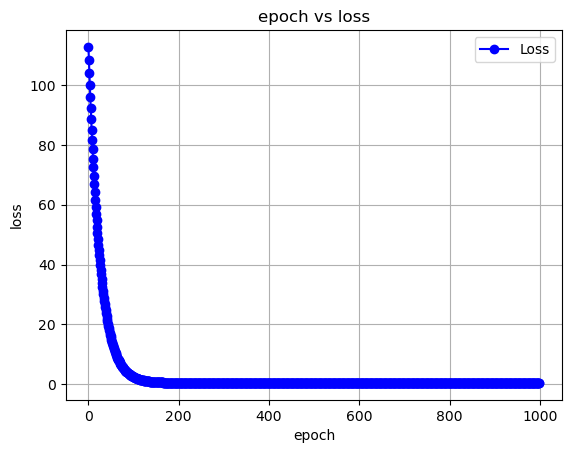

In [254]:
itr = list(range(epochs))
plt.plot(itr,loss,color = 'blue',marker= 'o',label= 'Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('epoch vs loss')
plt.legend()
plt.grid(True)
plt.show